In [ ]:
# The code was removed by DSX for sharing.

## Churn Analysis with R
Use the Telecommunications dataset from IBM SPSS Modeler Demo

#### First, load libraries and import dataset from "Demo" projectfolder. (pre-loaded)

In [1]:
library("MASS")
library("caret")
library("e1071")
library("randomForest")


Attaching package: ‘MASS’

The following object is masked from ‘package:SparkR’:

    select

Loading required package: lattice

Attaching package: ‘lattice’

The following object is masked from ‘package:SparkR’:

    histogram

Loading required package: ggplot2

Attaching package: ‘e1071’

The following objects are masked from ‘package:SparkR’:

    kurtosis, skewness

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [3]:
# The code was removed by DSX for sharing.

Loading required package: httr

Attaching package: ‘httr’

The following object is masked from ‘package:caret’:

    progress

Loading required package: RCurl
Loading required package: bitops

Attaching package: ‘RCurl’

The following object is masked from ‘package:SparkR’:

    base64



     tenure           age           address          income       
 Min.   : 1.00   Min.   :18.00   Min.   : 0.00   Min.   :   9.00  
 1st Qu.:17.00   1st Qu.:32.00   1st Qu.: 3.00   1st Qu.:  29.00  
 Median :34.00   Median :40.00   Median : 9.00   Median :  47.00  
 Mean   :35.53   Mean   :41.68   Mean   :11.55   Mean   :  77.53  
 3rd Qu.:54.00   3rd Qu.:51.00   3rd Qu.:18.00   3rd Qu.:  83.00  
 Max.   :72.00   Max.   :77.00   Max.   :55.00   Max.   :1668.00  
       ed            employ          equip          callcard    
 Min.   :1.000   Min.   : 0.00   Min.   :0.000   Min.   :0.000  
 1st Qu.:2.000   1st Qu.: 3.00   1st Qu.:0.000   1st Qu.:0.000  
 Median :3.000   Median : 8.00   Median :0.000   Median :1.000  
 Mean   :2.671   Mean   :10.99   Mean   :0.386   Mean   :0.678  
 3rd Qu.:4.000   3rd Qu.:17.00   3rd Qu.:1.000   3rd Qu.:1.000  
 Max.   :5.000   Max.   :47.00   Max.   :1.000   Max.   :1.000  
    wireless        longmon          tollmon          equipmon    
 Min.   :

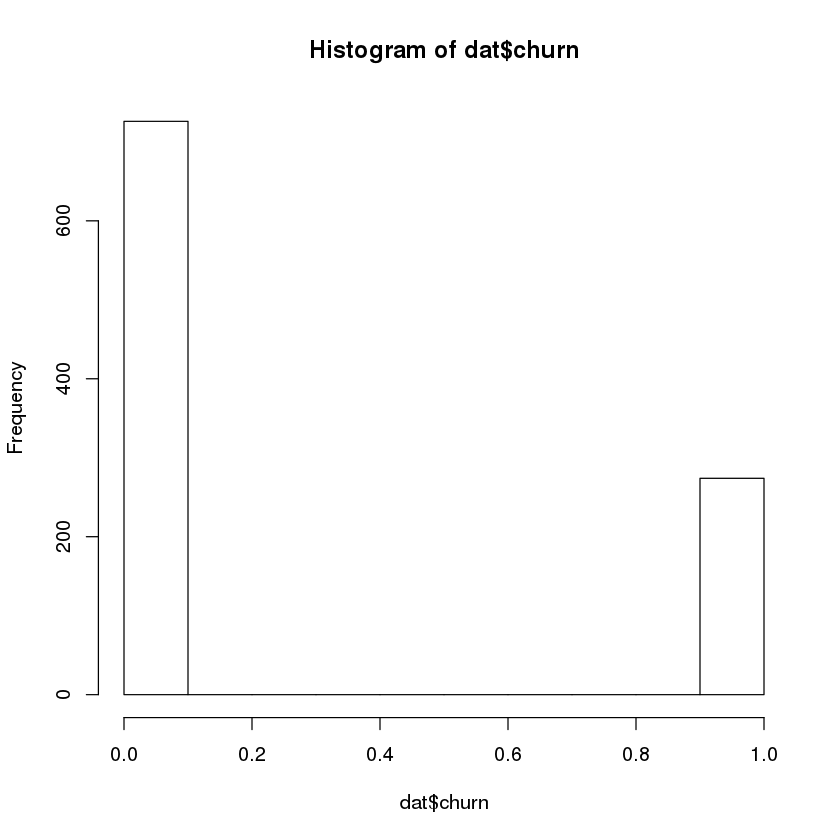

In [5]:
#Data Overview
summary(dat)
hist(dat$churn)

#### Create train and testing Dataset with an 80% to 20% split

In [7]:
set.seed(1235); idx <- sample.int(.8*nrow(dat), replace = FALSE) #80% For Training
dat_Train <- dat[idx,]
dat_Test <- dat[-idx,]

### Use Logistic Regression

In [8]:
#Data transformation
#.....

In [10]:
#Modeling
regmod = glm(churn~., family=binomial, data=dat_Train)
summary(regmod)


Call:
glm(formula = churn ~ ., family = binomial, data = dat_Train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0924  -0.7142  -0.3684   0.7298   2.8798  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept)  1.8149377  1.6658685   1.089  0.27594   
tenure      -0.0057334  0.0158637  -0.361  0.71779   
age          0.0082362  0.0120599   0.683  0.49465   
address     -0.0232750  0.0148713  -1.565  0.11756   
income      -0.0010635  0.0016031  -0.663  0.50705   
ed          -0.0352183  0.0994680  -0.354  0.72329   
employ      -0.0429167  0.0195354  -2.197  0.02803 * 
equip        0.7674449  0.6482922   1.184  0.23649   
callcard    -1.0165900  0.3251864  -3.126  0.00177 **
wireless     0.6332083  0.5378030   1.177  0.23904   
longmon      0.1912471  0.1349532   1.417  0.15644   
tollmon     -0.0185996  0.0187109  -0.994  0.32020   
equipmon    -0.0049459  0.0191297  -0.259  0.79599   
cardmon      0.0409593  0.0204433   2.004  0.0

In [11]:
#Since there are a lot of non-significant variables --> provide variable selection
reg_sub <- stepAIC(reg)
reg_sub$anova
summary(reg_sub)

Start:  AIC=756.58
churn ~ tenure + age + address + income + ed + employ + equip + 
    callcard + wireless + longmon + tollmon + equipmon + cardmon + 
    wiremon + longten + tollten + cardten + voice + pager + internet + 
    callwait + confer + ebill + loglong + logtoll + lninc + custcat

           Df Deviance    AIC
- custcat   1   700.58 754.58
- equipmon  1   700.64 754.64
- pager     1   700.66 754.66
- ed        1   700.70 754.70
- tenure    1   700.71 754.71
- confer    1   700.95 754.95
- wiremon   1   700.99 754.99
- age       1   701.04 755.04
- income    1   701.08 755.08
- tollmon   1   701.63 755.63
- equip     1   701.98 755.98
- wireless  1   701.98 755.98
- cardten   1   702.54 756.54
<none>          700.58 756.58
- longmon   1   702.58 756.58
- ebill     1   702.59 756.59
- loglong   1   702.84 756.84
- voice     1   703.04 757.04
- callwait  1   703.05 757.05
- address   1   703.06 757.06
- longten   1   703.33 757.33
- lninc     1   704.42 758.42
- cardmon   1   7

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,772,700.5768,756.5768
- custcat,1,0.00318238,773,700.5800,754.5800
- equipmon,1,0.06767354,774,700.6476,752.6476
- pager,1,0.09629084,775,700.7439,750.7439
- ed,1,0.12983478,776,700.8738,748.8738
- tenure,1,0.13199627,777,701.0058,747.0058
- confer,1,0.40146838,778,701.4072,745.4072
- income,1,0.45265834,779,701.8599,743.8599
- age,1,0.47244023,780,702.3323,742.3323
- wiremon,1,0.90655742,781,703.2389,741.2389



Call:
glm(formula = churn ~ address + employ + equip + callcard + longmon + 
    cardmon + longten + tollten + voice + internet + callwait + 
    ebill + loglong + logtoll + lninc, family = binomial, data = dat_Train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0713  -0.7247  -0.3730   0.7460   2.7746  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.2136308  1.5190282   1.457 0.145043    
address     -0.0190610  0.0134536  -1.417 0.156543    
employ      -0.0361242  0.0164149  -2.201 0.027757 *  
equip        0.6139808  0.2445276   2.511 0.012043 *  
callcard    -0.8916208  0.2977942  -2.994 0.002753 ** 
longmon      0.2501927  0.0859738   2.910 0.003613 ** 
cardmon      0.0166040  0.0108627   1.529 0.126381    
longten     -0.0034937  0.0009247  -3.778 0.000158 ***
tollten      0.0004628  0.0002225   2.080 0.037539 *  
voice        0.4292758  0.2534894   1.693 0.090367 .  
internet     0.5500034  0.2387157   2.304 0.021

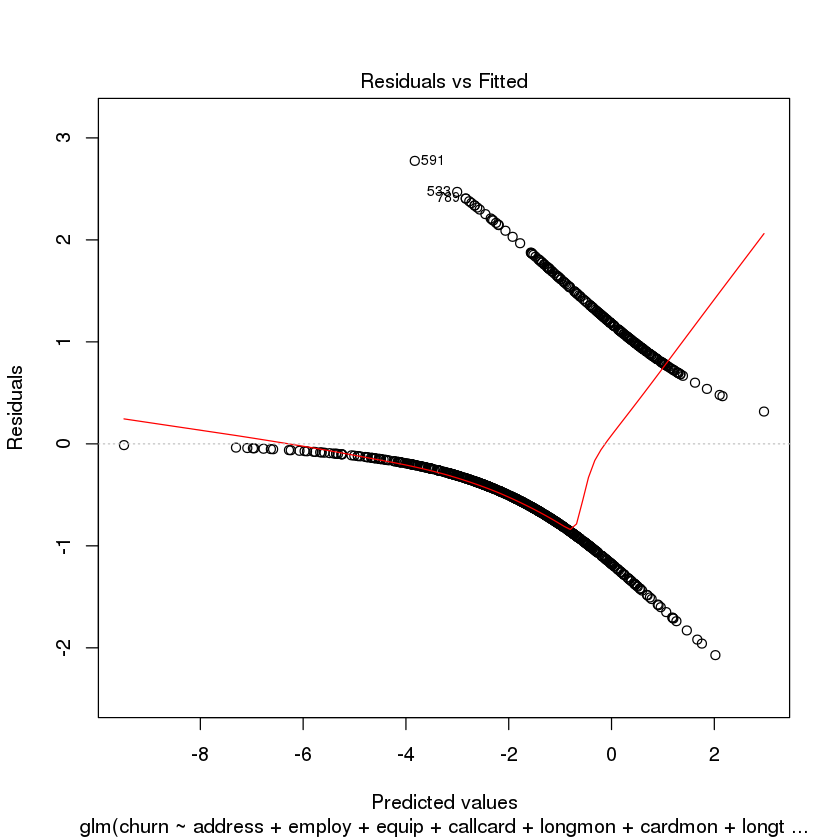

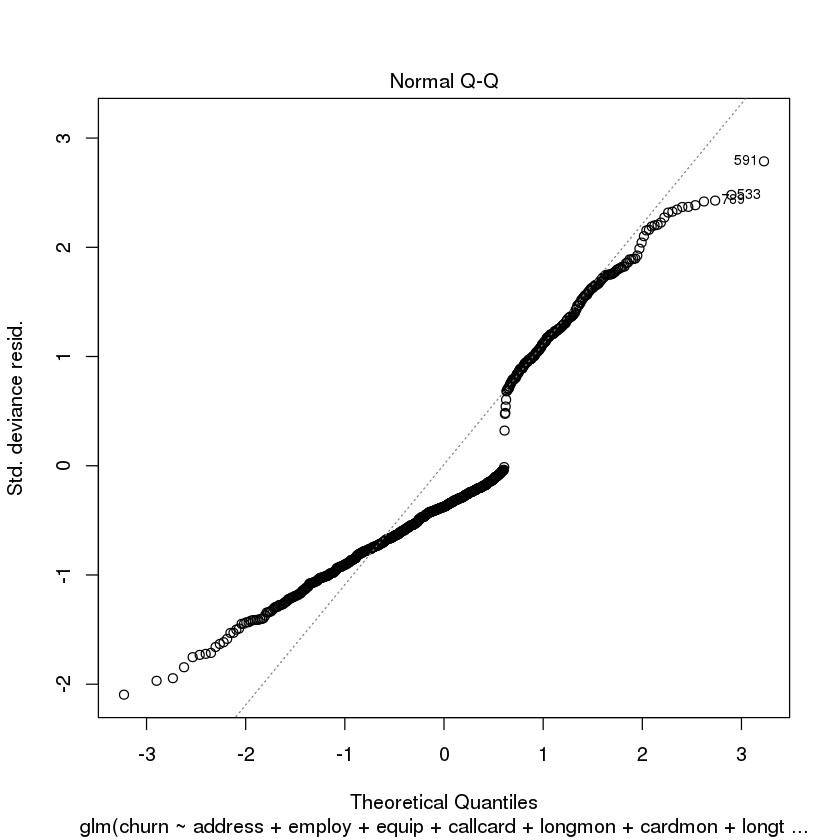

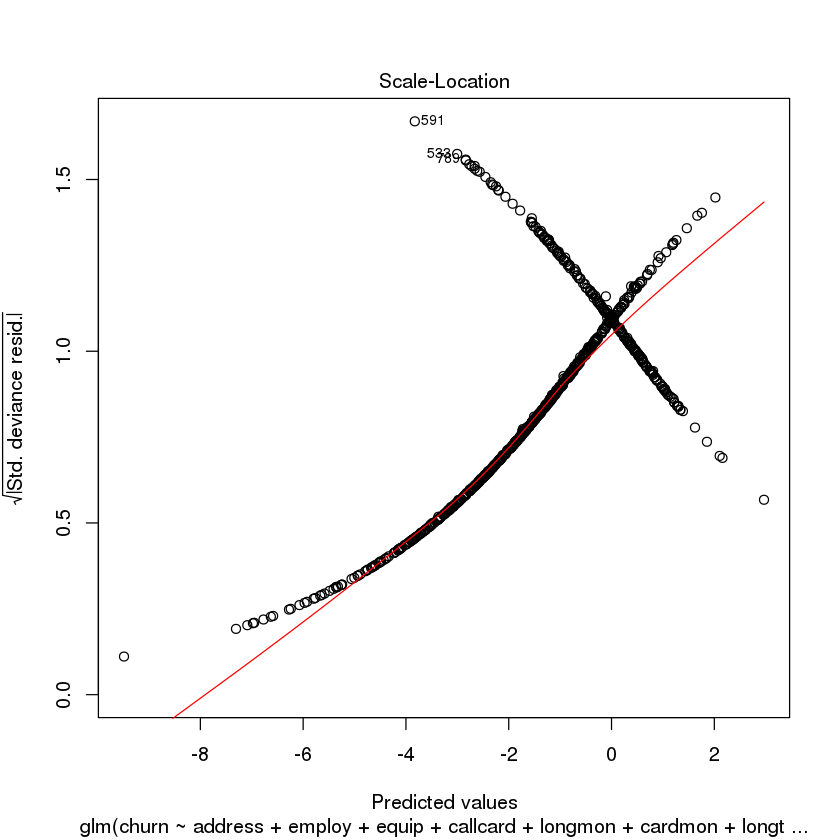

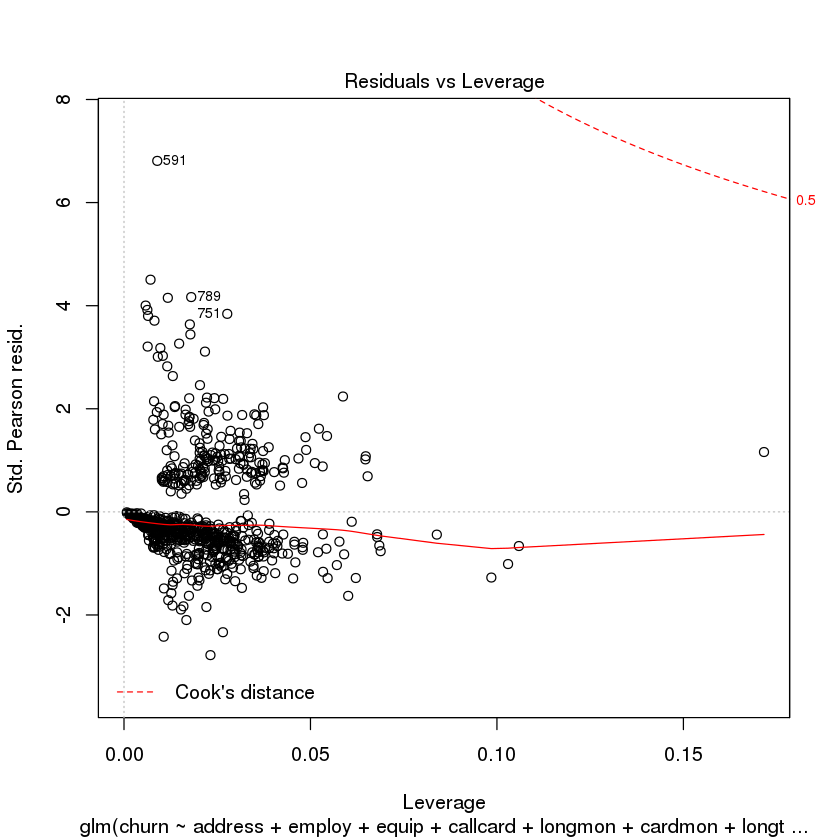

In [12]:
#Diagnostic Plot
plot(reg_sub)

In [18]:
#OOS Test
pred_oos <- predict.glm(reg_sub, newdata = dat_Test, "response")

xtab <- table(round(pred_oos,0), dat_Test$churn)
confusionMatrix(xtab)

Confusion Matrix and Statistics

   
      0   1
  0 126  35
  1  17  22
                                          
               Accuracy : 0.74            
                 95% CI : (0.6734, 0.7993)
    No Information Rate : 0.715           
    P-Value [Acc > NIR] : 0.2423          
                                          
                  Kappa : 0.2951          
 Mcnemar's Test P-Value : 0.0184          
                                          
            Sensitivity : 0.8811          
            Specificity : 0.3860          
         Pos Pred Value : 0.7826          
         Neg Pred Value : 0.5641          
             Prevalence : 0.7150          
         Detection Rate : 0.6300          
   Detection Prevalence : 0.8050          
      Balanced Accuracy : 0.6335          
                                          
       'Positive' Class : 0               
                                          

### Use Random Forest

In [9]:
(rfmod <- randomForest(as.factor(churn) ~ ., data=dat_Train))


Call:
 randomForest(formula = as.factor(churn) ~ ., data = dat_Train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 23.38%
Confusion matrix:
    0  1 class.error
0 524 59   0.1012007
1 128 89   0.5898618

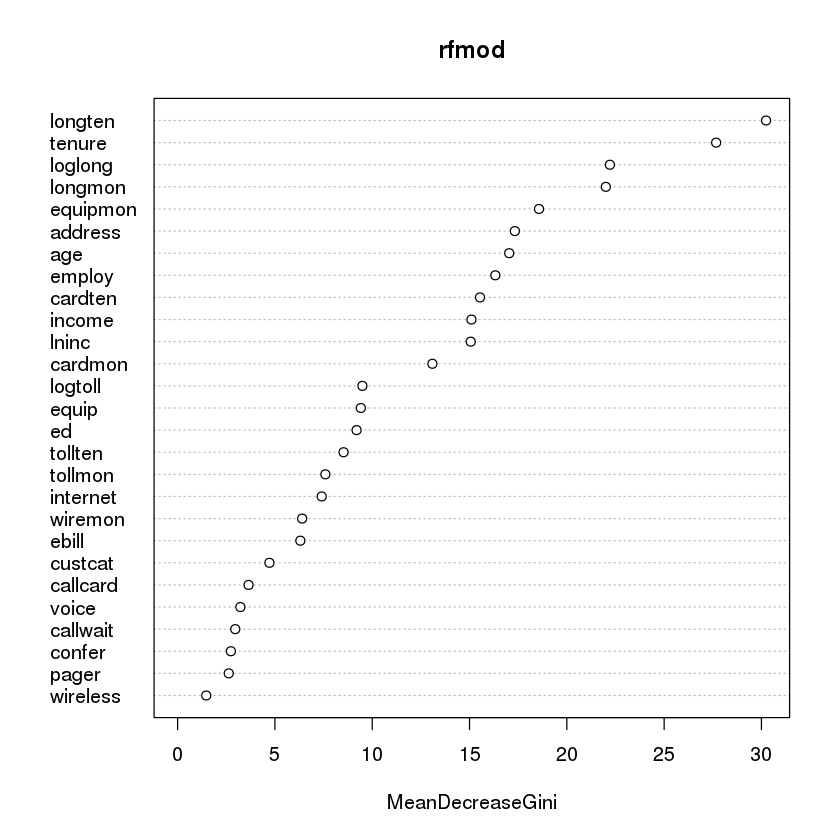

In [10]:
#Different Visualizations
varImpPlot(rfmod)

In [ ]:
#OOS Test
pred_oos <- predict(rfmod, newdata = dat_Test, "response")

xtabRF <- table(pred_oos, dat_Test$churn)

confusionMatrix(xtabRF)